<a href="https://colab.research.google.com/github/othoni-hub/ECG1/blob/main/Ch4_TP_Graphes_Dijkstra_Corrige.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG1** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>



# **Ch4 - TP : Graphes : Algorithme de Dijkstra**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**


![]()
<img src="https://images.itnewsinfo.com/lmi/articles/grande/000000051701.jpg" width="350" height="220"/>

## **Fonction de visualisation d'un graphe**

Rien dans ce paragraphe n'est exigible.

Inutile en 1<sup>ère</sup> lecture, on pourra essayer de comprendre en 2<sup>ème</sup> lecture

In [ ]:
from graphviz import Digraph # bibliothèque hors programme d'ECG

def show(gr):
        """Fonction qui reçoit en entrée un graphe gr, orienté ou non, pondéré ou non
        modélisé par une liste de couples ou de listes,
        et qui réalise la représentation graphique avec graphviz du graphe gr"""

        dispo="circo" # valeurs possibles "neato", "circo","dot","fdp"

        dot = Digraph(comment="Graphe", engine = dispo, format='svg') #Digraph est le module pour les graphes orientés ('Directed Graph')

        # Attibuts graphiques, pour jouer
        #dot.attr('graph', overlap = 'false', fontsize = '16', bgcolor = "#ffffff00",fontcolor="grey")
        #dot.attr('node', shape = 'circle', fixedsize = 'true', width = '0.4', fontsize = '14', style = "filled", color = 'grey')
        #dot.attr('edge', arrowsize = '0.7', fontsize = '12',color="grey",fontcolor="grey")

        for nd in liste_noeuds(gr):
            dot.node(nd,nd)
            for a in gr[nd]:
                # Teste si l'arête est orientée
                if arete(gr,a[0], nd) == arete(gr, nd, a[0]) :
                    # dessin d'une arête non orientée
                    if a[0]<= nd:
                        # On ne dessine qu'une seule arête sur les 2
                        if a[1] != 1:
                            dot.edge(nd, a[0],label=str(a[1]), dir="none")
                        else:
                            dot.edge(nd, a[0], dir="none")
                else:
                    # dessin d'une arête orientée
                    if a[1] != 1:
                        dot.edge(nd, a[0],label=str(a[1]))
                    else:
                        dot.edge(nd, a[0])
        return dot

### **Obtenir la liste des noeuds**

In [ ]:
 def liste_noeuds(gr):
        """Fonction qui reçoit en entrée un graphe gr 
        et renvoie la liste de ses noeuds"""
        nds = list(gr.keys())   # les noeuds sont les clés du dictionnaire
        nds.sort()              # on ordonne la liste des noeuds par ordre alphabétique
        return nds

### **Obtenir le poids d'une arête dans un graphe valué (pondéré)**

In [ ]:
 def arete(gr,nd1, nd2):
        """Fonction qui reçoit en entrées un graphe gr et deux noeuds nd1 et nd2,
        et qui renvoie le poids de l'arête nd1->nd2 ou 0 si pas d'arête"""
        if nd2 not in voisins(gr, nd1):
            return 0
        for a in gr[nd1]:
            if a[0] == nd2:
                return a[1]
    

### **Liste des voisins d'un noeud donné**

In [ ]:
 def voisins(gr, nd):
        """Fonction qui reçoit en entrées un graphe gr et un noeud nd
        et renvoie la liste des noeuds voisins du noeud nd dans le graphe gr"""
        if nd in liste_noeuds(gr):
            return [a[0] for a in gr[nd]]
        else:
            return []

# **Algorithmes de parcours de graphes**

###**Algorithme de Dijkstra : recherche d'un chemin de poids minimal dans un graphe valué**

source : http://math.univ-lyon1.fr/irem/Formation_ISN/formation_parcours_graphes/dijkstra/dijkstra.py

source vidéo : chaîne d'Yvan Monka :
https://youtu.be/rHylCtXtdNs 

In [ ]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/rHylCtXtdNs" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

### **Définition du graphe et recherche à la main du chemin minimal**

Mettre en oeuvre sur papier l'algorithme de Dijkstra avec le graphe suivant

In [ ]:
Graphe = {
	'A':{'B':2, 'C':1},
	'B':{'A':2, 'C':2, 'D':1, 'E':3},
	'C':{'A':1, 'B':2, 'D':4, 'E':3, 'F':5},
	'D':{'B':1, 'C':4, 'E':3, 'F':6, 'G':5},
	'E':{'B':3, 'C':3, 'D':3, 'F':1},
	'F':{'C':5, 'D':6, 'E':1, 'G':2},
	'G':{'D':5, 'F':2}
	}

In [ ]:
# Réécriture du Graphe en un format adapté pour la visulisation avec le fonction show
for nd1 in Graphe:
    Graphe[nd1] = list(Graphe[nd1].items())
Graphe

{'A': [('B', 2), ('C', 1)],
 'B': [('A', 2), ('C', 2), ('D', 1), ('E', 3)],
 'C': [('A', 1), ('B', 2), ('D', 4), ('E', 3), ('F', 5)],
 'D': [('B', 1), ('C', 4), ('E', 3), ('F', 6), ('G', 5)],
 'E': [('B', 3), ('C', 3), ('D', 3), ('F', 1)],
 'F': [('C', 5), ('D', 6), ('E', 1), ('G', 2)],
 'G': [('D', 5), ('F', 2)]}

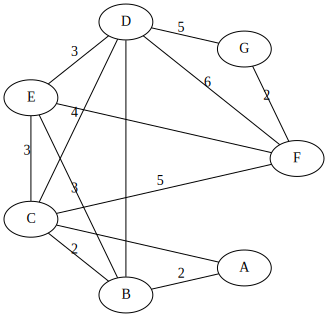

In [ ]:
show(Graphe)
# rappel : les arêtes de poids 1 ne sont pas étiquetées

In [ ]:
# ici, le graphe est implémenté sous forme d'un dictionnaire de dictionnaires au lieu d'un dictionnaire de listes

Graphe = {
	'A':{'B':2, 'C':1},
	'B':{'A':2, 'C':2, 'D':1, 'E':3},
	'C':{'A':1, 'B':2, 'D':4, 'E':3, 'F':5},
	'D':{'B':1, 'C':4, 'E':3, 'F':6, 'G':5},
	'E':{'B':3, 'C':3, 'D':3, 'F':1},
	'F':{'C':5, 'D':6, 'E':1, 'G':2},
	'G':{'D':5, 'F':2}
	}


In [ ]:
from math import inf # inf désigne l'infini

def mini(listeSommets, marque):
	"""
	Renvoie le sommet de listeSommets
	ayant la plus petite marque.
	"""
	marquePlusPetite = inf # infini est plus grand que n'importe quel flottant
	for s in listeSommets:                  # 
		if marque[s] < marquePlusPetite:    #
			marquePlusPetite = marque[s]    #
			sommetPlusPetit = s             #
	return sommetPlusPetit                  #
	
	
def dijkstra(graphe, depart, arrivee):
    ''' entrées :
        sorties :
        rôle :
    '''
    # initialisation
    marque = {}
    for sommet in graphe:       #
        marque[sommet] = inf    #
    marque[depart] = 0          #

    non_selectionnes = [sommet for sommet in graphe] # non_selectionnes est...

    pere = {}
    pere[depart] = None

    # boucle principale:
    while non_selectionnes:
        # sélection:
        s = mini(non_selectionnes, marque)  #
        if s == arrivee: break              # Ceci est un artifice Python permettant de ne pas aller jusqu'au bout des boucles 
                                            # quand on sait que ce n'est pas utile
        non_selectionnes.remove(s)          #

        # mise à  jour des voisins du sommet sélectionné:
        VoisinsAVisiter = [sommet for sommet in graphe[s] if sommet in non_selectionnes]    # liste définie par compréhension
                                                                                            # contenu : ...
        for sommet in VoisinsAVisiter:          #
            p = marque[s] + graphe[s][sommet]   #
            if p < marque[sommet]:              #
                marque[sommet] = p
                pere[sommet] = s
    return marque, pere
	 
	
def affichageCheminMin(graphe, depart, arrivee):
    '''
    entrée :
    sorties :
    rôle :
    '''
	distance, pere = dijkstra(Graphe, depart, arrivee)  #
	print("La distance de {} à {} est de longueur {}.".format(depart, arrivee, distance[arrivee]))
	chemin = arrivee
	sommet = arrivee
	while pere[sommet] != None:                         #
		chemin = pere[sommet] + chemin                  #
		sommet = pere[sommet]                           #
	print()
	print("Le chemin de {} à {} est : {}.".format(depart, arrivee,chemin))
 

affichageCheminMin(Graphe, 'A', 'G')

La distance de A à G est de longueur 7.

Le chemin de A à G est : ACEFG.


### **Schématisation de l'algorithme**

Représenter l'algorithme de Dijkstra complet par un organigramme.

In [ ]:
# Réécriture du Graphe en un format adapté pour la visulisation avec le fonction show
for nd1 in Graphe:
    Graphe[nd1] = list(Graphe[nd1].items())
Graphe

{'A': [('B', 2), ('C', 1)],
 'B': [('A', 2), ('C', 2), ('D', 1), ('E', 3)],
 'C': [('A', 1), ('B', 2), ('D', 4), ('E', 3), ('F', 5)],
 'D': [('B', 1), ('C', 4), ('E', 3), ('F', 6), ('G', 5)],
 'E': [('B', 3), ('C', 3), ('D', 3), ('F', 1)],
 'F': [('C', 5), ('D', 6), ('E', 1), ('G', 2)],
 'G': [('D', 5), ('F', 2)]}

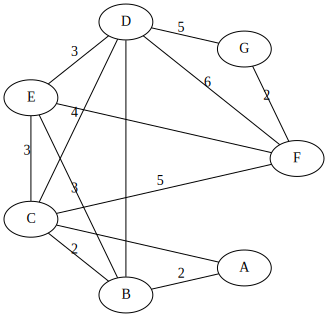

In [ ]:
show(Graphe)